<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Regression_PolynomialLinearRegression_Analysis_on_salary_and_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#polynomial Linear Regression

    This linear equation can be used to represent a linear relationship. But, in polynomial regression, 
    we have a polynomial equation of degree n represented as:

    Y = B0 + B1x + B2x^2 + B3x^3 + Bn x^n

    𝜃0 is the bias,
    𝜃1, 𝜃2, …, 𝜃n are the weights in the equation of the polynomial regression,
    n is the degree of the polynomial

In [34]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#import models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

##Polynomial Regression for single independent variable

In [2]:
df=pd.read_csv('/content/salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x=df[['Level']]       #in linear regression x is always 2D array
y=df['Salary']

#split data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

Text(0, 0.5, 'Salary')

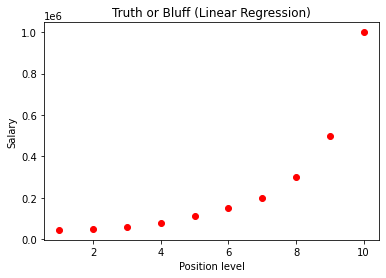

In [4]:
plt.scatter(x, y, color='red')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

Conclusion :

    We can observe curvilinear distribution of data points.

Text(0, 0.5, 'Salary')

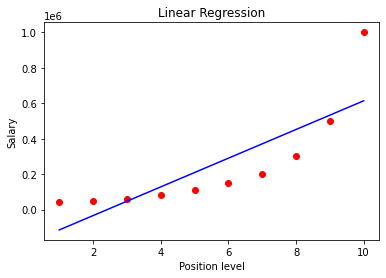

In [5]:
#linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

#Visualize Regression line
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

In [6]:
#Applyning polynomial features on independent variables
#degree increases gradually 
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#Checking performence of degree
prediction_acc={}
error={}
pred={}
for i in range(1,6):
  pipeline_lr=Pipeline([('transform',PolynomialFeatures(degree=i)),('model',LinearRegression())])
  model = pipeline_lr.fit(x, y)
  ypred = model.predict(x)
  pred["ypred"+str(i)]=ypred
  prediction_acc["degree"+str(i)]=model.score(xtrain,ytrain)
  error["degree"+str(i)]=mean_squared_error(y,ypred)

Text(0.5, 1.0, 'MSE of model for different degrees')

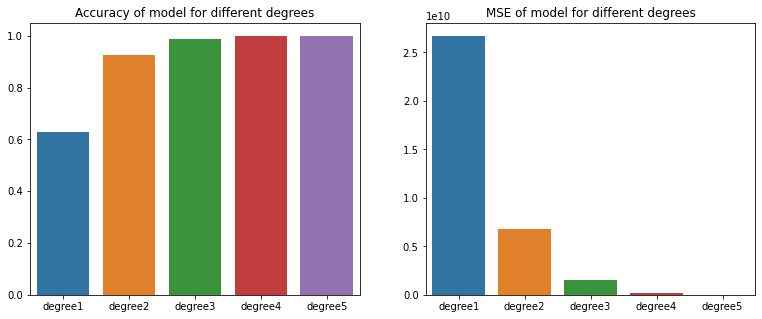

In [11]:
prediction_acc=pd.DataFrame(prediction_acc,index=(0,1,2,3))
error=pd.DataFrame(error,index=(0,1,2,3))
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(data=prediction_acc )
plt.title("Accuracy of model for different degrees")
plt.subplot(1,2,2)
sns.barplot(data=error )
plt.title("MSE of model for different degrees")



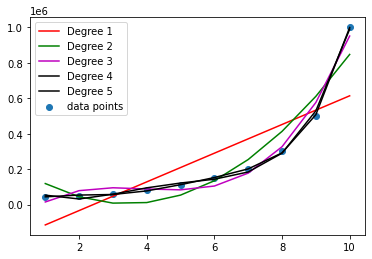

In [37]:
plt.scatter(x,y,label="data points")
plt.plot(x,pred['ypred1'], color='r',label="Degree 1")
plt.plot(x,pred['ypred2'], color='g',label="Degree 2")
plt.plot(x,pred['ypred3'], color='m',label="Degree 3")
plt.plot(x,pred['ypred4'], color='k',label="Degree 4")
plt.plot(x,pred['ypred5'], color='k',label="Degree 5")

plt.legend()

##Polynomial Regression for multiple independent variables

In [12]:
df=pd.read_csv('/content/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


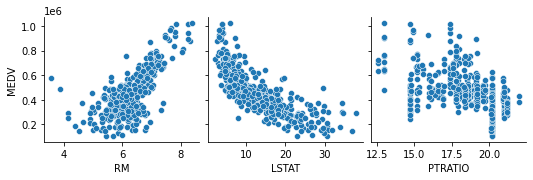

In [18]:

sns.pairplot(data=df,x_vars=['RM','LSTAT','PTRATIO'],y_vars=['MEDV'])

Conclusion :

    We can observe curvilinear distribution of data points.

In [19]:
x=df.drop(columns=['MEDV'])       #in linear regression x is always 2D array
y=df['MEDV']

#split data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

Text(0, 0.5, 'House Price')

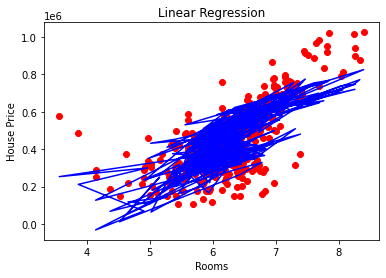

In [24]:
#linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

#Visualize Regression line
plt.scatter(x['RM'], y, color='red')
plt.plot(x['RM'],lin_reg.predict(x), color='blue')
plt.title('Linear Regression')
plt.xlabel('Rooms')
plt.ylabel('House Price')

In [25]:
#Applyning polynomial features on independent variables
#degree increases gradually 
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Checking performence of degree
prediction_acc={}
error={}
pred={}
for i in range(1,6):
  pipeline_lr=Pipeline([('transform',PolynomialFeatures(degree=i)),('model',LinearRegression())])
  model = pipeline_lr.fit(x, y)
  ypred = model.predict(x)
  pred["ypred"+str(i)]=ypred
  prediction_acc["degree"+str(i)]=model.score(xtrain,ytrain)
  error["degree"+str(i)]=mean_squared_error(y,ypred)

Text(0.5, 1.0, 'MSE of model for different degrees')

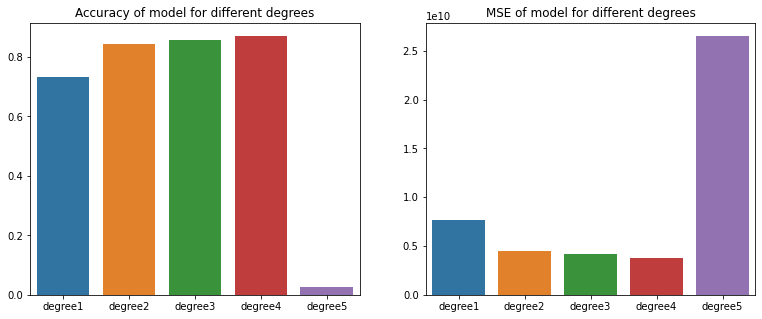

In [27]:
prediction_acc=pd.DataFrame(prediction_acc,index=(0,1,2,3))
error=pd.DataFrame(error,index=(0,1,2,3))
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(data=prediction_acc )
plt.title("Accuracy of model for different degrees")
plt.subplot(1,2,2)
sns.barplot(data=error )
plt.title("MSE of model for different degrees")

Conclusion :

    We can observe sudden decrease in accaracy and sudden increase in loss, after degree 4. So can take degree 4 as best fitting parameter.

Best Fitting degree 

In [30]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
ypred=model.predict(x_poly)
print(model.score(x_poly,y))
print(mean_squared_error(y,ypred))


0.8612239920129637
3786018035.98609


In [41]:
# Predicting a new result with Polymonial Regression
model.predict(poly.fit_transform([[6.575 ,4.98 ,	15.3]]))    #504000 is the real price for these features

array([590592.08740827])